In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras import models, layers
import os
from keras.models import load_model

In [2]:
ds_train=tf.keras.utils.image_dataset_from_directory("ProjectDir_Pet/train",batch_size=20)

Found 40 files belonging to 2 classes.


In [3]:
ds_test=tf.keras.utils.image_dataset_from_directory("ProjectDir_Pet/test",batch_size=20)

Found 20 files belonging to 2 classes.


In [4]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(40)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

In [5]:
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

In [6]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [7]:
model = models.Sequential()
model.add(layers.Input(shape=(256, 256, 3)))
model.add(data_augmentation)
model.add( layers.Conv2D( 32, (5, 5 ), activation = 'tanh',kernel_initializer='glorot_uniform'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (5, 5 ),kernel_initializer='glorot_uniform', activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(32,kernel_initializer='he_normal',activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(1,kernel_initializer='he_normal', activation = 'sigmoid'))

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 252, 252, 32)      2432      
                                                                 
 batch_normalization (BatchN  (None, 252, 252, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      51264     
                                                                 
 batch_normalization_1 (Batc  (None, 122, 122, 64)    

In [9]:
history = model.compile(
    optimizer = tf.keras.optimizers.Adam(0.00001),
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)

In [10]:
history = model.fit(
    ds_train,  
    epochs=100,
    validation_data=ds_test,
) 
print('Number of total epochs ran:')
len(history.history['val_binary_accuracy']) 

Epoch 1/100
2/2 [==============================] - 15s 5s/step - loss: 0.7774 - binary_accuracy: 0.5000 - val_loss: 0.6915 - val_binary_accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 7s 4s/step - loss: 0.8984 - binary_accuracy: 0.6000 - val_loss: 0.6921 - val_binary_accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 7s 4s/step - loss: 0.9741 - binary_accuracy: 0.4500 - val_loss: 0.6945 - val_binary_accuracy: 0.5500
Epoch 4/100
2/2 [==============================] - 7s 4s/step - loss: 0.8663 - binary_accuracy: 0.6000 - val_loss: 0.6948 - val_binary_accuracy: 0.5500
Epoch 5/100
2/2 [==============================] - 7s 4s/step - loss: 0.8942 - binary_accuracy: 0.5000 - val_loss: 0.6947 - val_binary_accuracy: 0.5500
Epoch 6/100
2/2 [==============================] - 7s 4s/step - loss: 1.0278 - binary_accuracy: 0.4750 - val_loss: 0.6935 - val_binary_accuracy: 0.5500
Epoch 7/100
2/2 [==============================] - 7s 4s/step - loss: 0.8691 - binary_a

100

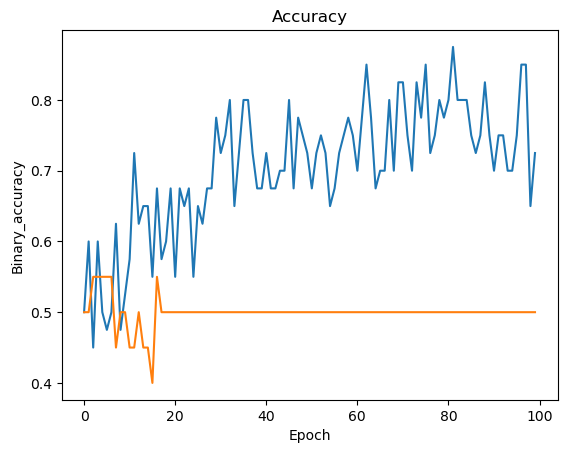

In [11]:
import matplotlib.pyplot as plt
epochs= range(1, 100+1) 
plt.plot(history.history['binary_accuracy']) 
plt.plot(history.history['val_binary_accuracy']) 
plt.title('Accuracy') 
plt.ylabel('Binary_accuracy') 
plt.xlabel('Epoch') 
plt.show()

In [12]:
import matplotlib.pyplot as plt

class_name=['cat', 'dog']

1/1 [==============================] - 1s 753ms/step


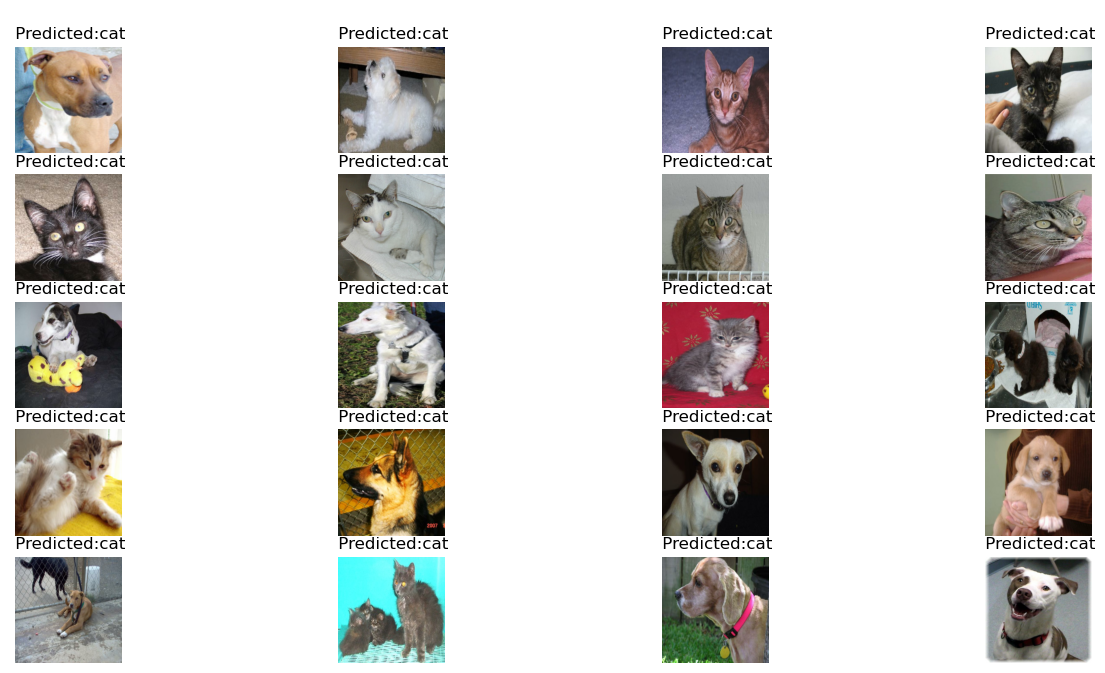

In [13]:
for images, labels in ds_test.take(20):
    predictions = model.predict(images)
    
def image_print(i, prediction_arr, img):
    prediction_label = int(prediction_arr[i] >0.5) #1 if greater than 0.5, 0 if less than 0.5 , since we used sigmoid
    plt.imshow(img[i])
    plt.title(f'\n Predicted:{class_name[prediction_label]}')
    plt.axis('off')
    
fig, axes = plt.subplots(4,5, figsize=(16,8))
for i in range(20):#since there are 20 images
    plt.subplot(5,4, i+1)
    image_print(i, predictions, images)
plt.show()

10 out of 20 predictions are wrong, all the cats are categorised correct, but all the dog images are also categorised as cat

In [14]:
history = model.compile(
    optimizer = tf.keras.optimizers.Adam(0.00001),
    #loss='binary_crossentropy', 
    #metrics=['accuracy']
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)

In [15]:
history = model.fit(
    ds_train,  
    epochs=200,
    validation_data=ds_test,
) 
print('Number of total epochs ran:')
len(history.history['val_binary_accuracy']) 

Epoch 1/200
2/2 [==============================] - 12s 4s/step - loss: 0.3550 - binary_accuracy: 0.8250 - val_loss: 0.8916 - val_binary_accuracy: 0.5000
Epoch 2/200
2/2 [==============================] - 7s 4s/step - loss: 0.4473 - binary_accuracy: 0.7500 - val_loss: 0.8919 - val_binary_accuracy: 0.5000
Epoch 3/200
2/2 [==============================] - 7s 4s/step - loss: 0.4661 - binary_accuracy: 0.8000 - val_loss: 0.8826 - val_binary_accuracy: 0.5000
Epoch 4/200
2/2 [==============================] - 7s 4s/step - loss: 0.3523 - binary_accuracy: 0.8500 - val_loss: 0.8717 - val_binary_accuracy: 0.5000
Epoch 5/200
2/2 [==============================] - 7s 4s/step - loss: 0.3802 - binary_accuracy: 0.8250 - val_loss: 0.8594 - val_binary_accuracy: 0.5000
Epoch 6/200
2/2 [==============================] - 7s 4s/step - loss: 0.5586 - binary_accuracy: 0.7500 - val_loss: 0.8570 - val_binary_accuracy: 0.5000
Epoch 7/200
2/2 [==============================] - 7s 4s/step - loss: 0.4335 - binary_a

2/2 [==============================] - 7s 4s/step - loss: 0.3163 - binary_accuracy: 0.8750 - val_loss: 0.6568 - val_binary_accuracy: 0.5500
Epoch 108/200
2/2 [==============================] - 7s 4s/step - loss: 0.3041 - binary_accuracy: 0.9250 - val_loss: 0.6582 - val_binary_accuracy: 0.5500
Epoch 109/200
2/2 [==============================] - 7s 4s/step - loss: 0.2898 - binary_accuracy: 0.8750 - val_loss: 0.6630 - val_binary_accuracy: 0.5500
Epoch 110/200
2/2 [==============================] - 7s 4s/step - loss: 0.3200 - binary_accuracy: 0.8500 - val_loss: 0.6652 - val_binary_accuracy: 0.5500
Epoch 111/200
2/2 [==============================] - 7s 4s/step - loss: 0.3701 - binary_accuracy: 0.8000 - val_loss: 0.6672 - val_binary_accuracy: 0.5500
Epoch 112/200
2/2 [==============================] - 7s 4s/step - loss: 0.3979 - binary_accuracy: 0.8250 - val_loss: 0.6697 - val_binary_accuracy: 0.5500
Epoch 113/200
2/2 [==============================] - 7s 4s/step - loss: 0.2725 - binary_ac

200

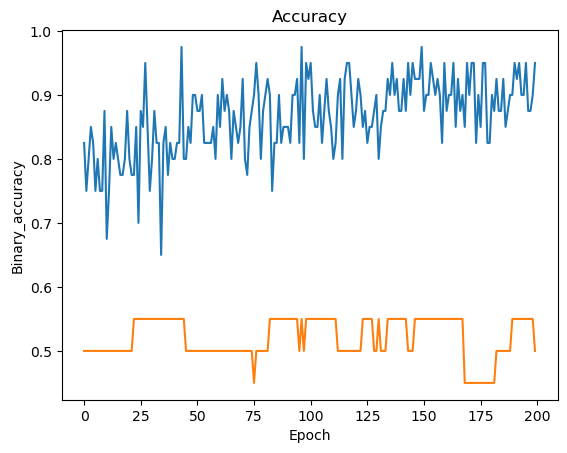

In [16]:
import matplotlib.pyplot as plt
epochs= range(1, 200+1) 
plt.plot(history.history['binary_accuracy']) 
plt.plot(history.history['val_binary_accuracy']) 
plt.title('Accuracy') 
plt.ylabel('Binary_accuracy') 
plt.xlabel('Epoch') 
plt.show()

1/1 [==============================] - 1s 899ms/step


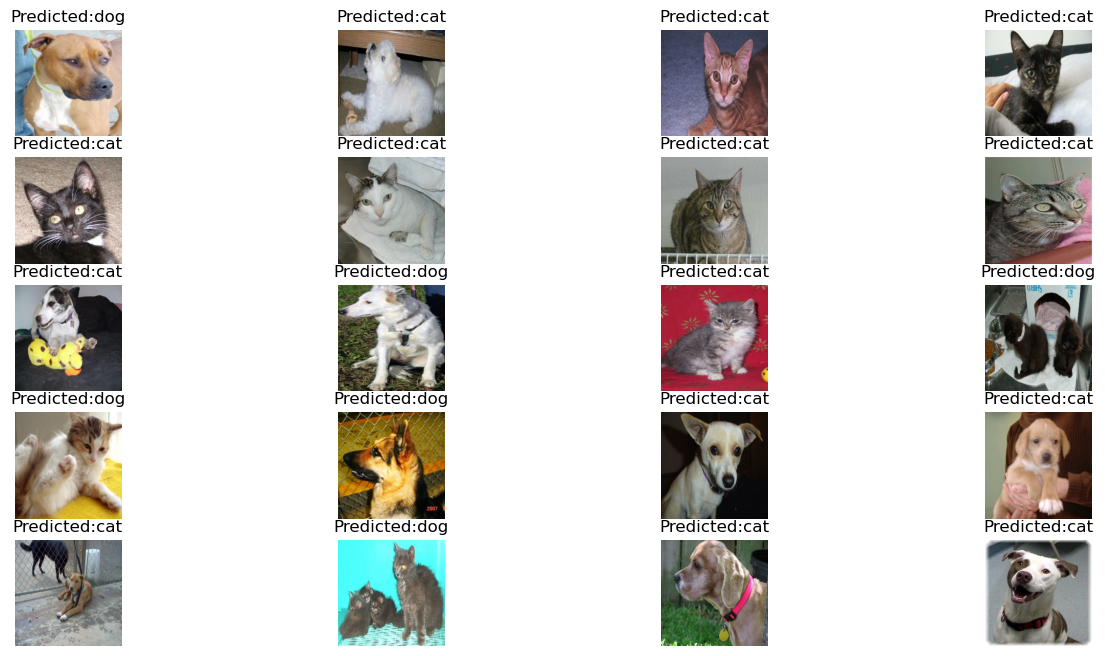

In [17]:
for images, labels in ds_test.take(20):
    predictions = model.predict(images)
    
def image_print(i, prediction_arr, img):
    prediction_label = int(prediction_arr[i] >0.5) #1 if greater than 0.5, 0 if less than 0.5 , since we used sigmoid
    plt.imshow(img[i])
    plt.title(f'Predicted:{class_name[prediction_label]}')
    plt.axis('off')
    
fig, axes = plt.subplots(4,5, figsize=(16,8))
for i in range(20):#since there are 20 images
    plt.subplot(5,4, i+1)
    image_print(i, predictions, images)
plt.show()

9 out of 20 predictions are wrong

In [18]:
history = model.compile(
    optimizer = tf.keras.optimizers.Adam(0.00001),
    #loss='binary_crossentropy', 
    #metrics=['accuracy']
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)

In [19]:
history = model.fit(
    ds_train,  
    epochs=300,
    validation_data=ds_test,
) 
print('Number of total epochs ran:')
len(history.history['val_binary_accuracy']) 

Epoch 1/300
2/2 [==============================] - 15s 5s/step - loss: 0.2450 - binary_accuracy: 0.9250 - val_loss: 0.7926 - val_binary_accuracy: 0.5000
Epoch 2/300
2/2 [==============================] - 8s 4s/step - loss: 0.2166 - binary_accuracy: 0.9250 - val_loss: 0.7853 - val_binary_accuracy: 0.4500
Epoch 3/300
2/2 [==============================] - 7s 4s/step - loss: 0.2279 - binary_accuracy: 0.9500 - val_loss: 0.7859 - val_binary_accuracy: 0.4500
Epoch 4/300
2/2 [==============================] - 8s 4s/step - loss: 0.2603 - binary_accuracy: 0.9750 - val_loss: 0.7794 - val_binary_accuracy: 0.5000
Epoch 5/300
2/2 [==============================] - 8s 4s/step - loss: 0.2978 - binary_accuracy: 0.8500 - val_loss: 0.7759 - val_binary_accuracy: 0.5000
Epoch 6/300
2/2 [==============================] - 8s 4s/step - loss: 0.2675 - binary_accuracy: 0.9250 - val_loss: 0.7694 - val_binary_accuracy: 0.5500
Epoch 7/300
2/2 [==============================] - 8s 4s/step - loss: 0.2626 - binary_a

2/2 [==============================] - 7s 4s/step - loss: 0.1711 - binary_accuracy: 0.9750 - val_loss: 1.0201 - val_binary_accuracy: 0.6000
Epoch 108/300
2/2 [==============================] - 7s 4s/step - loss: 0.1814 - binary_accuracy: 0.9500 - val_loss: 1.0140 - val_binary_accuracy: 0.6000
Epoch 109/300
2/2 [==============================] - 7s 4s/step - loss: 0.2237 - binary_accuracy: 0.9250 - val_loss: 1.0070 - val_binary_accuracy: 0.6500
Epoch 110/300
2/2 [==============================] - 7s 4s/step - loss: 0.2329 - binary_accuracy: 0.9500 - val_loss: 1.0055 - val_binary_accuracy: 0.6500
Epoch 111/300
2/2 [==============================] - 7s 4s/step - loss: 0.1808 - binary_accuracy: 0.9750 - val_loss: 1.0088 - val_binary_accuracy: 0.6500
Epoch 112/300
2/2 [==============================] - 7s 4s/step - loss: 0.2366 - binary_accuracy: 0.9250 - val_loss: 1.0117 - val_binary_accuracy: 0.6000
Epoch 113/300
2/2 [==============================] - 7s 4s/step - loss: 0.2270 - binary_ac

2/2 [==============================] - 7s 4s/step - loss: 0.1663 - binary_accuracy: 1.0000 - val_loss: 1.1407 - val_binary_accuracy: 0.5500
Epoch 214/300
2/2 [==============================] - 7s 4s/step - loss: 0.1707 - binary_accuracy: 0.9500 - val_loss: 1.1379 - val_binary_accuracy: 0.5500
Epoch 215/300
2/2 [==============================] - 7s 4s/step - loss: 0.2494 - binary_accuracy: 0.9000 - val_loss: 1.1367 - val_binary_accuracy: 0.5500
Epoch 216/300
2/2 [==============================] - 7s 4s/step - loss: 0.2125 - binary_accuracy: 0.9500 - val_loss: 1.1352 - val_binary_accuracy: 0.5500
Epoch 217/300
2/2 [==============================] - 7s 4s/step - loss: 0.1376 - binary_accuracy: 0.9750 - val_loss: 1.1364 - val_binary_accuracy: 0.5500
Epoch 218/300
2/2 [==============================] - 7s 4s/step - loss: 0.2021 - binary_accuracy: 0.9500 - val_loss: 1.1403 - val_binary_accuracy: 0.5500
Epoch 219/300
2/2 [==============================] - 7s 4s/step - loss: 0.1908 - binary_ac

300

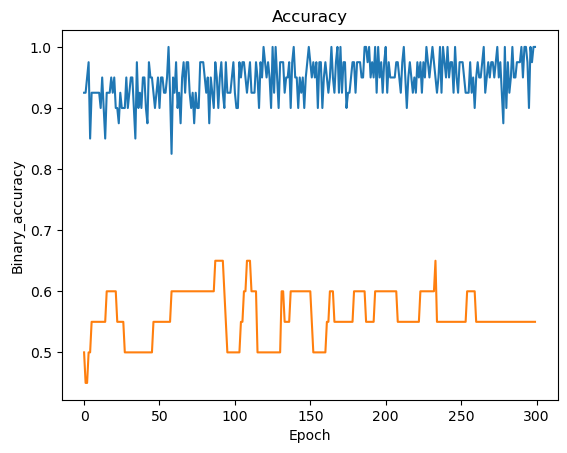

In [20]:
import matplotlib.pyplot as plt
epochs= range(1, 300+1) 
plt.plot(history.history['binary_accuracy']) 
plt.plot(history.history['val_binary_accuracy']) 
plt.title('Accuracy') 
plt.ylabel('Binary_accuracy') 
plt.xlabel('Epoch') 
plt.show()

1/1 [==============================] - 0s 364ms/step


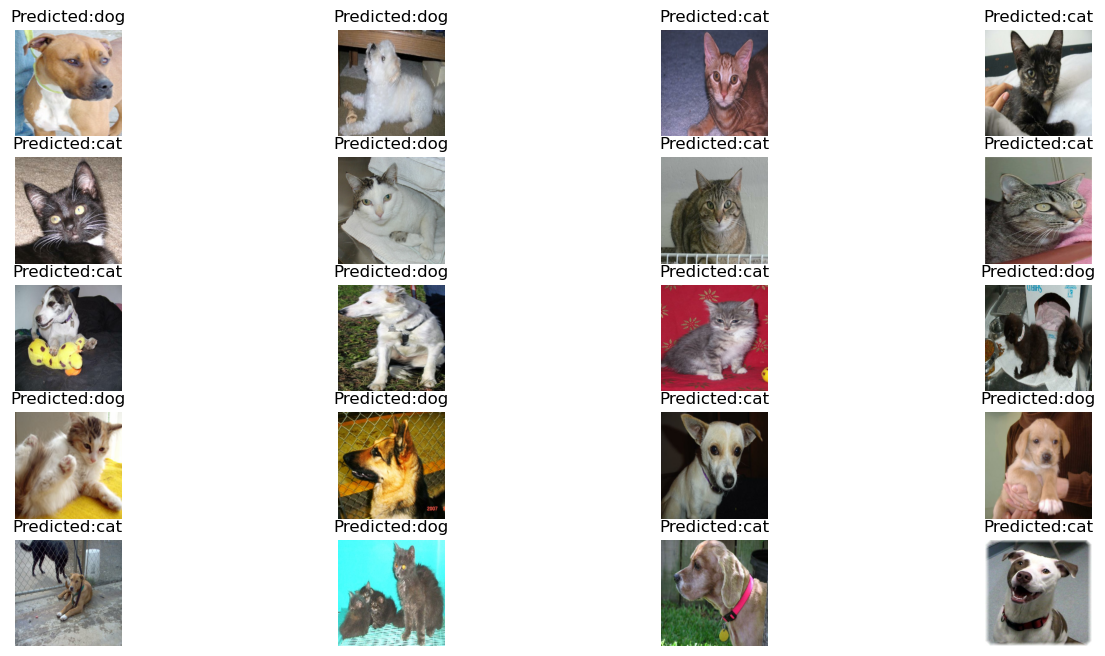

In [21]:
for images, labels in ds_test.take(20):
    predictions = model.predict(images)
    
def image_print(i, prediction_arr, img):
    prediction_label = int(prediction_arr[i] >0.5) #1 if greater than 0.5, 0 if less than 0.5 , since we used sigmoid
    plt.imshow(img[i])
    plt.title(f'Predicted:{class_name[prediction_label]}')
    plt.axis('off')
    
fig, axes = plt.subplots(4,5, figsize=(16,8))
for i in range(20):#since there are 20 images
    plt.subplot(5,4, i+1)
    image_print(i, predictions, images)
plt.show()

7 out of 20 predictions are wrong